In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Cargar imagen
img = cv2.imread('../../datos/cubismo.png', cv2.IMREAD_GRAYSCALE)


In [9]:
def convolve2d(image, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+kh, j:j+kw]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)
    
    return output.astype(np.uint8)


In [10]:
# 1. Enfocar
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])

# 2. Suavizado (Blur)
kernel_blur = np.ones((3, 3), dtype=np.float32) / 9

# 3. Borde (Sobel + cruzado aproximado)
kernel_edge = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

# Aplicar convoluciones manuales
img_sharpen = convolve2d(img, kernel_sharpen)
img_blur = convolve2d(img, kernel_blur)
img_edge = convolve2d(img, kernel_edge)


In [11]:
sharpen_cv = cv2.filter2D(img, -1, kernel_sharpen)
blur_cv = cv2.filter2D(img, -1, kernel_blur)
edge_cv = cv2.filter2D(img, -1, kernel_edge)


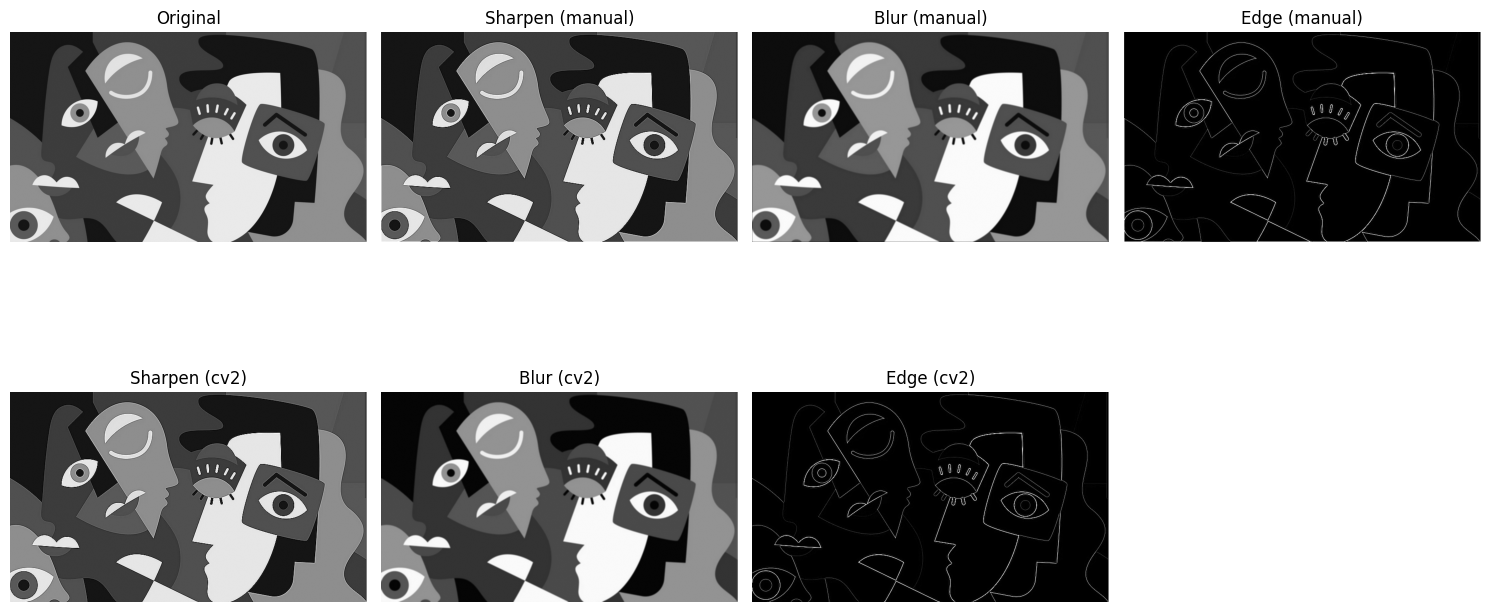

In [12]:
titles = ["Original", "Sharpen (manual)", "Blur (manual)", "Edge (manual)",
          "Sharpen (cv2)", "Blur (cv2)", "Edge (cv2)"]
images = [img, img_sharpen, img_blur, img_edge, sharpen_cv, blur_cv, edge_cv]

plt.figure(figsize=(15, 8))
for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
frames = []
for im in images:
    pil_img = Image.fromarray(im).convert("P")  # convert to 8-bit palette
    frames.append(pil_img)

frames[0].save("../../resultados/filtros_kernels.gif", save_all=True, append_images=frames[1:], duration=800, loop=0)
